In [3]:
import tensorflow_hub as hub
import tensorflow_text as text


In [4]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [5]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)

In [6]:
text_test = ['nice movie indeed','I love python programming']
text_preprocessed = bert_preprocess_model(text_test) # this gives a dictionary
text_preprocessed.keys()

dict_keys(['input_type_ids', 'input_mask', 'input_word_ids'])

In [7]:
text_preprocessed['input_mask'] # 2: sentences,CLS token and SEP to seperate 2 sentences
# 128 max length of a sentences

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [8]:
text_preprocessed["input_word_ids"]

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  3835,  3185,  5262,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [9]:
bert_model = hub.KerasLayer(encoder_url)


In [10]:
bert_results = bert_model(text_preprocessed)


In [11]:
bert_results.keys()


dict_keys(['pooled_output', 'sequence_output', 'encoder_outputs', 'default'])

In [12]:
bert_results['pooled_output'] # embedding for each entire sentence


<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.791774  , -0.21411912,  0.49769545, ...,  0.24465235,
        -0.47334474,  0.8175869 ],
       [-0.9171231 , -0.4793518 , -0.78656983, ..., -0.6175178 ,
        -0.7102687 ,  0.92184305]], dtype=float32)>

In [13]:
bert_results['sequence_output']


<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.07292055,  0.08567822,  0.14476831, ..., -0.0967709 ,
          0.08722139,  0.07711068],
        [ 0.17839365, -0.19006082,  0.5034951 , ..., -0.05869842,
          0.3271711 , -0.15578556],
        [ 0.18701443, -0.43388733, -0.48875216, ..., -0.15502742,
          0.00145182, -0.24470933],
        ...,
        [ 0.12083032,  0.1288427 ,  0.46453518, ...,  0.07375532,
          0.17441945,  0.16522188],
        [ 0.07967904, -0.01190669,  0.5022545 , ...,  0.13777721,
          0.21002236,  0.00624595],
        [-0.07212678, -0.28303453,  0.5903338 , ...,  0.47551897,
          0.16668475, -0.0892035 ]],

       [[-0.07900588,  0.3633512 , -0.21101615, ..., -0.17183745,
          0.16299728,  0.6724266 ],
        [ 0.27883428,  0.43716276, -0.35764802, ..., -0.04463619,
          0.38315177,  0.58879846],
        [ 1.2037671 ,  1.0727018 ,  0.48408794, ...,  0.24921013,
          0.4073096 ,  0.40481815],
        ...,

In [14]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Wajihboukhdhir/bert-spam-classification/refs/heads/main/spam.csv")
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


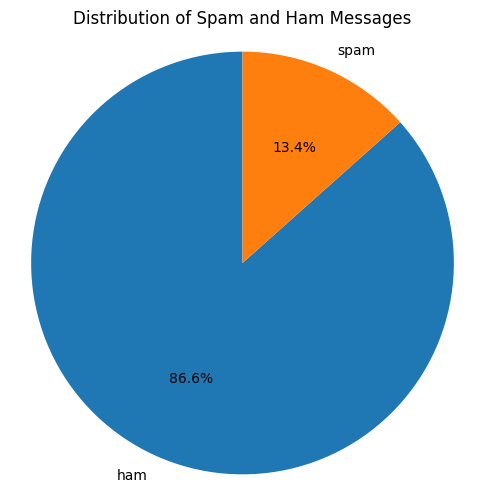

In [15]:
# @title Distribution of Spam and Ham Messages

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
category_counts = df['Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Spam and Ham Messages')
_ = plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

In [16]:
df_spam = df[df['Category']=='spam']
df_spam.head()

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [17]:
df_ham = df[df['Category']=='ham']


In [18]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [19]:
df_balanced = pd.concat([df_spam, df_ham_downsampled])
df_balanced.shape

(1494, 2)

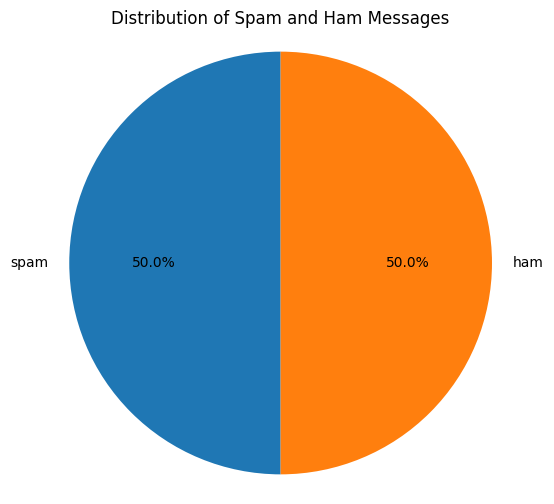

In [20]:
# @title Distribution of Spam and Ham Messages

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
category_counts = df_balanced['Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Spam and Ham Messages')
_ = plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

In [21]:
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 0 if x=='ham' else 1)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'],df_balanced['spam'], stratify=df_balanced['spam'])

In [23]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [24]:
bert_preprocess = hub.KerasLayer(preprocess_url)
bert_encoder = hub.KerasLayer(encoder_url)


In [25]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    #get the embedding for each sentence
    return bert_encoder(preprocessed_text)['pooled_output']

In [26]:
e = get_sentence_embeding([
    "cristiano ronaldo",
    "book"]
)

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.6035256]], dtype=float32)

In [29]:
import tensorflow as tf
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [31]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer_2 (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [32]:
len(X_train)


1120

In [33]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [34]:
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
35/35 [==============================] - 20s 319ms/step - loss: 0.6732 - accuracy: 0.5920 - precision: 0.5985 - recall: 0.5589
Epoch 2/10
35/35 [==============================] - 11s 318ms/step - loss: 0.5379 - accuracy: 0.7875 - precision: 0.7855 - recall: 0.7911
Epoch 3/10
35/35 [==============================] - 11s 316ms/step - loss: 0.4634 - accuracy: 0.8295 - precision: 0.8187 - recall: 0.8464
Epoch 4/10
35/35 [==============================] - 11s 323ms/step - loss: 0.4137 - accuracy: 0.8580 - precision: 0.8404 - recall: 0.8839
Epoch 5/10
35/35 [==============================] - 12s 337ms/step - loss: 0.3866 - accuracy: 0.8696 - precision: 0.8508 - recall: 0.8964
Epoch 6/10
35/35 [==============================] - 11s 328ms/step - loss: 0.3579 - accuracy: 0.8759 - precision: 0.8834 - recall: 0.8661
Epoch 7/10
35/35 [==============================] - 11s 327ms/step - loss: 0.3360 - accuracy: 0.8848 - precision: 0.8696 - recall: 0.9054
Epoch 8/10
35/35 [================

In [35]:
model.evaluate(X_test, y_test)


12/12 [==============================] - 5s 304ms/step - loss: 0.2534 - accuracy: 0.9198 - precision: 0.8945 - recall: 0.9519


[0.25339797139167786,
 0.9197860956192017,
 0.8944723606109619,
 0.9518716335296631]

In [36]:

y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

12/12 [==============================] - 4s 315ms/step


array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[166,  21],
       [  9, 178]])

In [38]:
print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       187
           1       0.89      0.95      0.92       187

    accuracy                           0.92       374
   macro avg       0.92      0.92      0.92       374
weighted avg       0.92      0.92      0.92       374

